In [1]:
import numpy as np
import pandas as pd 

In [2]:
matchD = pd.read_csv('iplStats/matches.csv')
deliveryD = pd.read_csv('iplStats/deliveries.csv')

In [3]:
matchD.shape

(756, 18)

In [4]:
matchD.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveryD.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Making a total score column 
as we can see in the match details we are not provided with total runs scored, so we will take those details from the deliveryD file 

In [6]:
totalScore = deliveryD.groupby(['match_id' , 'inning']).sum()['total_runs'].reset_index()

In [7]:
totalScore = totalScore[totalScore['inning'] == 1]

In [8]:
totalScore

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


### Merging and creating new match DF matchU(pdated)

In [9]:
matchU = matchD.merge(totalScore[['match_id' , 'total_runs']] , left_on = 'id' , right_on = 'match_id')

In [10]:
matchU

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [11]:
matchU['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Will be replacing Delhi Daredevils with Delhi Capitals and Deccan Chargers with Sunrisers Hydrabad 

(also removing some discontinued teams)

In [12]:
matchU['team1'] = matchU['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matchU['team2'] = matchU['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

matchU['team1'] = matchU['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matchU['team2'] = matchU['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


In [13]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [14]:
matchU = matchU[matchU['team1'].isin(teams)]
matchU = matchU[matchU['team2'].isin(teams)]

In [15]:
matchU.shape

(641, 20)

removing the DL method games (as they are not played for full length and can impact the prediction in neg way)

In [16]:
matchU = matchU[matchU['dl_applied'] == 0]

In [17]:
matchU = matchU[['match_id' , 'city' , 'winner' , 'total_runs']]

In [18]:
deliveryU = matchU.merge(deliveryD , on = 'match_id')

collecting all the data of second data now to have a look on pattern of chasing scores

In [19]:
deliveryU = deliveryU[deliveryU['inning'] == 2]

In [20]:
deliveryU.dtypes

match_id             int64
city                object
winner              object
total_runs_x         int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs_y         int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [21]:
deliveryU['current_score'] = deliveryU.groupby('match_id')['total_runs_y'].cumsum()

In [22]:
deliveryU['runs_left'] = deliveryU['total_runs_x'] - deliveryU['current_score']

In [23]:
deliveryU

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5


its (126 - x) cus we are calculating balls by over*6 and the first over starts from 1 and not 0 

In [24]:
deliveryU['balls_left'] = 126 - (deliveryU['over'] * 6 + deliveryU['ball'])

### Calculating wickets left 

In [25]:
deliveryU['player_dismissed'] = deliveryU['player_dismissed'].fillna("0")
deliveryU['player_dismissed'] = deliveryU['player_dismissed'].apply(lambda x: x if x =='0' else "1")
deliveryU['player_dismissed'] = deliveryU['player_dismissed'].astype('int')

wicketsB = deliveryU.groupby('match_id')['player_dismissed'].cumsum()
wickets = wicketsB.values

deliveryU['wickets_left'] = 10 - wickets 

In [26]:
deliveryU

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4


now we will make columns for current run rate (crr) and required run rate (rrr) 

In [27]:
#crr 
deliveryU['crr'] = (deliveryU['current_score']*6)/(120 - deliveryU['balls_left'])

#rrr
deliveryU['rrr'] = (deliveryU['runs_left']*6)/deliveryU['balls_left']

#### adding result column to know if the run was chased down or not 

In [28]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0 

In [29]:
deliveryU['result'] = deliveryU.apply(result , axis = 1)

#### Changing the name of total runs x -> which is the runs scored by first team to Target Score 

In [30]:
deliveryU['target_score'] = deliveryU['total_runs_x']
deliveryU.drop(columns = ['total_runs_x'] , inplace = True)

## Making final df to store all the required information

In [31]:
deliveryU.columns

Index(['match_id', 'city', 'winner', 'inning', 'batting_team', 'bowling_team',
       'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'player_dismissed',
       'dismissal_kind', 'fielder', 'current_score', 'runs_left', 'balls_left',
       'wickets_left', 'crr', 'rrr', 'result', 'target_score'],
      dtype='object')

In [32]:
fdf = deliveryU[['batting_team' , 'bowling_team' , 'city' , 'runs_left' , 'balls_left' , 'wickets_left' , 'crr' , 'rrr' , 'target_score','result']]

In [33]:
fdf

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,crr,rrr,target_score,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,6.000000,10.386555,207,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,3.000000,10.474576,207,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,2.000000,10.564103,207,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,4.500000,10.551724,207,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,8.400000,10.434783,207,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,7.862069,0.000000,152,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,7.897436,-4.000000,152,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,7.881356,-9.000000,152,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,4,7.915966,-30.000000,152,0


In [34]:
fdf = fdf.sample(fdf.shape[0])

In [35]:
fdf.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,crr,rrr,target_score,result
13609,Chennai Super Kings,Delhi Daredevils,Delhi,78,46,7,8.837838,10.173913,187,1


In [36]:
fdf.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets_left      0
crr               0
rrr               7
target_score      0
result            0
dtype: int64

In [37]:
fdf.dropna(inplace = True)

In [38]:
fdf = fdf[fdf['balls_left'] != 0]

In [39]:
from sklearn.model_selection import train_test_split 

X = fdf.drop(['result'] , axis = 1)
y = fdf['result']

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42)

#### One hot encoding the string columns so we can run our models 

In [40]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 

trf = ColumnTransformer([
    ('trf', OneHotEncoder( drop = 'first') , ['batting_team' , 'bowling_team' , 'city'])
]
,remainder = 'passthrough')

In [41]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

Logistic Regression 

In [42]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(solver = 'liblinear'))
])

Random Forest Classifier 

In [43]:
pip2 = Pipeline(steps = [
    ('step1', trf),
    ('step2', RandomForestClassifier())
])

In [44]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [45]:
pip2.fit(X_train , y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [46]:
##Logistic Regression result 
y_p1 = pipe.predict(X_test)
accuracy_score(y_test, y_p1)

0.8069073783359497

In [47]:
##Random Forest result
y_p2 = pip2.predict(X_test)
accuracy_score(y_test , y_p2)

0.9987665395828661

In [52]:
pipe.predict_proba(X_test)[50]

array([0.17711753, 0.82288247])

In [49]:
def match_summary(row):
        print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['target_score']))

In [53]:
deliveryU.columns

Index(['match_id', 'city', 'winner', 'inning', 'batting_team', 'bowling_team',
       'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'player_dismissed',
       'dismissal_kind', 'fielder', 'current_score', 'runs_left', 'balls_left',
       'wickets_left', 'crr', 'rrr', 'result', 'target_score'],
      dtype='object')

In [83]:
def match_progression(xdf , match_id , pipe):
    #getting the match id and then last ball of each over
    match = xdf[xdf['match_id'] == match_id]
    match = match[(match['ball'] == 6)]

    #removing columns which are not required for match scoreboard/progression    
    tempdf = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','target_score','crr','rrr']].dropna()    
    tempdf = tempdf[tempdf['balls_left'] != 0]

    result = pipe.predict_proba(tempdf)

    tempdf['lose'] = np.round(result.T[0]*100 , 1)
    tempdf['win'] = np.round(result.T[1]*100, 1)

    #numbering the overs
    tempdf['endOfOver'] = range(1 , tempdf.shape[0] + 1)

    #runs per over 
    target = tempdf['target_score'].values[0]
    runs = list(tempdf['runs_left'].values)

    new_runs = runs[:]
    runs.insert(0,target)

    tempdf['runsAfterOver'] = np.array(runs)[:-1] - np.array(new_runs)
    
    #creating wickets list and makin wickets in over 
    wickets = list(tempdf['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)

    w = np.array(wickets)
    nw = np.array(new_wickets)

    tempdf['wicketsInOver'] = (nw - w)[0:tempdf.shape[0]]

    #creating df
    print("Target-" , target)
    tempdf = tempdf[['endOfOver' , 'runsAfterOver' , 'wicketsInOver', 'lose', 'win']]
    return tempdf,target 
    

    

In [90]:
tempdf, target = match_progression(deliveryU, 12, pipe)
tempdf

Target- 142


,endOfOver,runsAfterOver,wicketsInOver,lose,win
1564,1,3,0,8.7,91.3
1571,2,4,1,15.8,84.2
1577,3,1,3,61.2,38.8
1583,4,2,0,65.5,34.5
1589,5,8,0,61.0,39.0
1595,6,3,0,63.9,36.1
1601,7,10,0,56.5,43.5
1607,8,2,1,74.7,25.3
1613,9,3,0,77.1,22.9
1620,10,12,0,68.7,31.3


Text(0.5, 1.0, 'Target - 142')

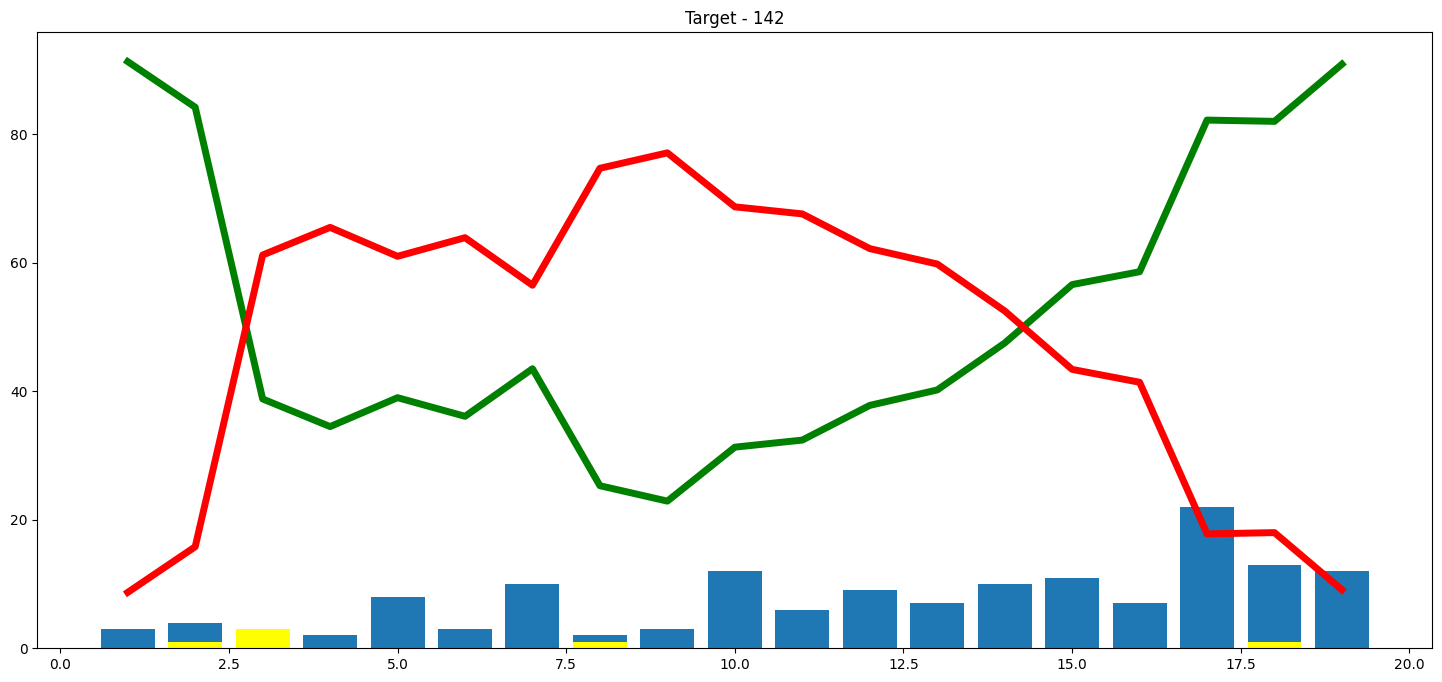

In [91]:
import matplotlib.pyplot as plt 

plt.figure(figsize =(18,8))
plt.plot(tempdf['endOfOver'] , tempdf['win'] , color = 'green' , linewidth=5)
plt.plot(tempdf['endOfOver'] , tempdf['lose'] , color = 'red' , linewidth = 5)
plt.bar(tempdf['endOfOver'] , tempdf['runsAfterOver'])
plt.bar(tempdf['endOfOver'] , tempdf['wicketsInOver'], color ='yellow')

plt.title("Target - " + str(target))

In [92]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [99]:
deliveryU['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [101]:
#taking pipe object
import pickle
pickle.dump(pipe , open('pipe.pkl' , 'wb'))